In [1]:
import pandas as pd
import numpy as np
import os
import cv2

In [2]:
import os
images = []
for dirname, _, filenames in os.walk(r'.\ImagesAndData'):
    for filename in filenames:
        images.append((os.path.join(dirname, filename)))

In [3]:
#print(images)

In [4]:
image_df = pd.DataFrame(images,columns = ["img_path"])

In [5]:
image_df['new_Img'] = image_df['img_path'].str.slice(start = 0,stop = -4)

In [6]:
sized = image_df.groupby("new_Img").count().reset_index()

In [7]:
to_remove = sized[sized["img_path"] == 1]["new_Img"].to_list()

In [8]:
actual = image_df[~image_df["new_Img"].isin(to_remove)]

In [9]:
actual

,img_path,new_Img
0,.\ImagesAndData\img0.jpg,.\ImagesAndData\img0
1,.\ImagesAndData\img0.txt,.\ImagesAndData\img0
2,.\ImagesAndData\img1.jpg,.\ImagesAndData\img1
3,.\ImagesAndData\img1.txt,.\ImagesAndData\img1
4,.\ImagesAndData\img10.jpg,.\ImagesAndData\img10
...,...,...
2651,.\ImagesAndData\img993.txt,.\ImagesAndData\img993
2656,.\ImagesAndData\img998.jpg,.\ImagesAndData\img998
2657,.\ImagesAndData\img998.txt,.\ImagesAndData\img998
2658,.\ImagesAndData\img999.jpg,.\ImagesAndData\img999


In [10]:
with open("DataSet4.csv", "w") as text_file:
    text_file.write(actual.to_csv(index=False))

In [11]:
new_df = pd.DataFrame({'img_path':actual['img_path'].iloc[::2].values, 'txt_path':actual['img_path'].iloc[1::2].values})

In [12]:
new_df

,img_path,txt_path
0,.\ImagesAndData\img0.jpg,.\ImagesAndData\img0.txt
1,.\ImagesAndData\img1.jpg,.\ImagesAndData\img1.txt
2,.\ImagesAndData\img10.jpg,.\ImagesAndData\img10.txt
3,.\ImagesAndData\img100.jpg,.\ImagesAndData\img100.txt
4,.\ImagesAndData\img1001.jpg,.\ImagesAndData\img1001.txt
...,...,...
1216,.\ImagesAndData\img991.jpg,.\ImagesAndData\img991.txt
1217,.\ImagesAndData\img992.jpg,.\ImagesAndData\img992.txt
1218,.\ImagesAndData\img993.jpg,.\ImagesAndData\img993.txt
1219,.\ImagesAndData\img998.jpg,.\ImagesAndData\img998.txt


In [13]:
new_df['burn_degree'] = ""
index=0
for i in new_df['txt_path']:
    with open(i) as f:
        f = f.read()
        print(f[:1])
        new_df['burn_degree'][index] = f[:1] 
        index+=1

0
1
0
0
0
2
0
2
2
0
2
0
2
0
0
2
0
1
1
1
0
1
1
0
1
1
1
1
2
0
0
1
1
0
0
0
0
2
0
1
0
0
2
0
0
0
1
2
2
0
1
2
2
1
1
2
1
0
1
0
0
2
1
1
1
0
1
2
0
0
1
0
1
1
2
0
2
0
0
1
0
1
0
0
1
1
1
0
0
2
1
1
0
2
1
1
1
2
2
2
1
0
1
0
1
0
1
0
0
2
1
2
1
1
0
1
1
1
1
0
1
1
0
0
1
1
1
1
2
0
2
2
0
0
0
0
1
0
0
1
2
0
0
1
1
1
0
2
1
0
1
0
1
0
0
0
1
1
2
0
1
0
0
1
2
0
0
2
2
1
1
0
1
1
1
1
1
0
0
1
1
1
1
1
0
1
0
0
1
1
0
0
1
2
1
1
1
2
1
2
0
0
0
0
1
2
2
2
1
1
1
2
0
1
1
0
0
0
1
1
1
1
1
1
2
1
0
2
2
1
1
0
1
1
0
1
1
0
2
2
0
1
0
1
1
2
1
1
2
1
0
2
1
0
1
0
0
0
0
1
1
2
1
1
2
2
1
0
0
1
1
0
1
1
0
0
1
0
0
0
0
1
1
1
1
0
1
2
1
1
2
0
1
0
1
1
0
1
1
2
0
1
1
1
2
0
0
2
0
2
0
0
0
1
1
1
1
1
1
2
1
1
0
0
0
0
0
1
1
1
0
0
0
1
2
2
0
1
1
1
1
0
1
1
2
0
0
0
0
0
2
1
1
0
2
1
2
0
1
1
1
0
0
0
2
2
0
1
1
2
0
0
1
1
1
1
0
0
0
1
0
0
1
1
0
2
1
1
2
0
0
1
2
0
1
2
1
1
1
0
1
0
0
0
2
0
0
1
0
1
1
1
1
0
2
1
0
0
0
2
0
1
0
1
1
0
2
0
1
1
1
1
1
0
0
0
1
1
1
2
2
1
2
0
1
1
2
1
0
2
1
0
0
2
0
1
0
2
0
0
1
1
2
0
0
1
1
1
0
2
1
1
2
0
2
0
0
1
1
0
0
1
2
2
1
1
1
0
0
2
1
1
2
1
1
1
0
1
1
0


In [14]:
new_df.burn_degree.value_counts()

0    532
1    488
2    201
Name: burn_degree, dtype: int64

In [15]:
new_df

,img_path,txt_path,burn_degree
0,.\ImagesAndData\img0.jpg,.\ImagesAndData\img0.txt,0
1,.\ImagesAndData\img1.jpg,.\ImagesAndData\img1.txt,1
2,.\ImagesAndData\img10.jpg,.\ImagesAndData\img10.txt,0
3,.\ImagesAndData\img100.jpg,.\ImagesAndData\img100.txt,0
4,.\ImagesAndData\img1001.jpg,.\ImagesAndData\img1001.txt,0
...,...,...,...
1216,.\ImagesAndData\img991.jpg,.\ImagesAndData\img991.txt,0
1217,.\ImagesAndData\img992.jpg,.\ImagesAndData\img992.txt,0
1218,.\ImagesAndData\img993.jpg,.\ImagesAndData\img993.txt,2
1219,.\ImagesAndData\img998.jpg,.\ImagesAndData\img998.txt,1


In [16]:
import os
import numpy as np
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Convolution2D, MaxPooling2D, ZeroPadding2D
from keras import optimizers
import tensorflow as tf
import shutil
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import keras

In [17]:
img_width, img_height = 250,250

In [18]:
datagen = ImageDataGenerator(rescale=1./255)

In [19]:
dst_dir = r".\train"
train_dir=new_df['img_path'].to_list()
y=new_df["burn_degree"].to_list()

In [20]:
dst_dir

'.\\train'

In [21]:
# define the keras model
model = Sequential()
model.add(Convolution2D(32,3,3, input_shape=(img_width,img_height,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Convolution2D(16,3,3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Flatten())
'''model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))'''
model.add(Dense(3))
model.add(Activation('softmax'))

In [22]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  dst_dir,
  validation_split=0.2,
  subset="training",
  seed=6699,
  color_mode='rgb',
  image_size=(img_height, img_width),
  label_mode='categorical',
  batch_size=32)

Found 1221 files belonging to 3 classes.
Using 977 files for training.


In [23]:
validation_ds = tf.keras.utils.image_dataset_from_directory(
  dst_dir,
  validation_split=0.2,
  subset="validation",
  color_mode='rgb',
  seed = 6699,
  image_size=(img_height, img_width),
  label_mode='categorical',
  batch_size=32)

Found 1221 files belonging to 3 classes.
Using 244 files for validation.


In [24]:
"""
indexr = 0
for f in train_dir:
    if (new_df['burn_degree'][indexr]=='0'):
        shutil.copy(f,r".\Project_DataSet\train\0")
    if (new_df['burn_degree'][indexr]=='1'):
        shutil.copy(f,r".\Project_DataSet\train\1")
    if (new_df['burn_degree'][indexr]=='2'):
        shutil.copy(f,r".\Project_DataSet\train\2")
    indexr+=1"""

'\nindexr = 0\nfor f in train_dir:\n    if (new_df[\'burn_degree\'][indexr]==\'0\'):\n        shutil.copy(f,r".\\Project_DataSet\train\x00")\n    if (new_df[\'burn_degree\'][indexr]==\'1\'):\n        shutil.copy(f,r".\\Project_DataSet\train\x01")\n    if (new_df[\'burn_degree\'][indexr]==\'2\'):\n        shutil.copy(f,r".\\Project_DataSet\train\x02")\n    indexr+=1'

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 83, 83, 32)        896       
                                                                 
 activation (Activation)     (None, 83, 83, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 41, 41, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 16)        4624      
                                                                 
 activation_1 (Activation)   (None, 13, 13, 16)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 16)         0         
 2D)                                                    

In [26]:
optimizer = tf.optimizers.Adam(lr=0.001)

C:\Users\Etay\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [27]:
model.compile(loss='categorical_crossentropy',
             metrics=['acc'],optimizer=optimizer)

In [28]:
history = model.fit(
    train_ds.repeat(),
    steps_per_epoch=15,
    epochs=20,
    verbose=1,
    validation_data = validation_ds,
    #validation_steps=8 
)
model.save('model.h5')

Epoch 1/20
15/15 [==============================] - 3s 130ms/step - loss: 17.6024 - acc: 0.3938 - val_loss: 4.9096 - val_acc: 0.3689
Epoch 2/20
15/15 [==============================] - 2s 105ms/step - loss: 3.7562 - acc: 0.3750 - val_loss: 2.5418 - val_acc: 0.3852
Epoch 3/20
15/15 [==============================] - 2s 145ms/step - loss: 1.6913 - acc: 0.4538 - val_loss: 1.3256 - val_acc: 0.4016
Epoch 4/20
15/15 [==============================] - 2s 125ms/step - loss: 1.2289 - acc: 0.4563 - val_loss: 1.1742 - val_acc: 0.4221
Epoch 5/20
15/15 [==============================] - 3s 195ms/step - loss: 1.1771 - acc: 0.4323 - val_loss: 1.1528 - val_acc: 0.4139
Epoch 6/20
15/15 [==============================] - 2s 117ms/step - loss: 1.1479 - acc: 0.5104 - val_loss: 1.1408 - val_acc: 0.4098
Epoch 7/20
15/15 [==============================] - 2s 137ms/step - loss: 1.1061 - acc: 0.4516 - val_loss: 1.1330 - val_acc: 0.4098
Epoch 8/20
15/15 [==============================] - 2s 107ms/step - loss: 1

In [29]:
train_ds.class_names

['0', '1', '2']

In [30]:
def nn_training_analysis(history_data, is_tuning, ax1):

    color = 'tab:red'
    ax1.set_xlabel('Epoch', size = 15, fontweight = 'bold')
    ax1.set_ylabel('Loss', color = color, size = 15, fontweight = 'bold')
    tr_loss, = ax1.plot(history_data['loss'], color = color, linestyle = '--')
    val_loss, = ax1.plot(history_data['val_loss'], color = color, linestyle = '-')
    ax1.tick_params(axis = 'y', labelcolor = color, labelsize = 10)
    plt.xticks(weight = 'bold')
    plt.yticks(weight = 'bold')
    if is_tuning and 'tune_data_loss' in history_data.keys():
        tune_loss, = ax1.plot(history_data['tune_data_loss'], color = color, linestyle = '-.')

    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

    color = 'tab:blue'
    ax2.set_ylabel('F1 Score', color = color, size = 15, fontweight = 'bold')  # we already handled the x-label with ax1
    tr_f1, = ax2.plot(history_data['acc'], color = color, linestyle = '--')
    val_f1, = ax2.plot(history_data['val_acc'], color = color, linestyle = '-')
    ax2.tick_params(axis = 'y', labelcolor = color, labelsize = 10)
    plt.yticks(weight = 'bold')

    ax1.legend([tr_loss, val_loss, tr_f1, val_f1], ['train loss', 'val_loss', 'train_acc', 'val_acc'], fontsize = 12,
    loc = 'center right', fancybox = True, framealpha = 1, shadow = True, borderpad = 1,
    bbox_to_anchor = (1.2, 0.8))


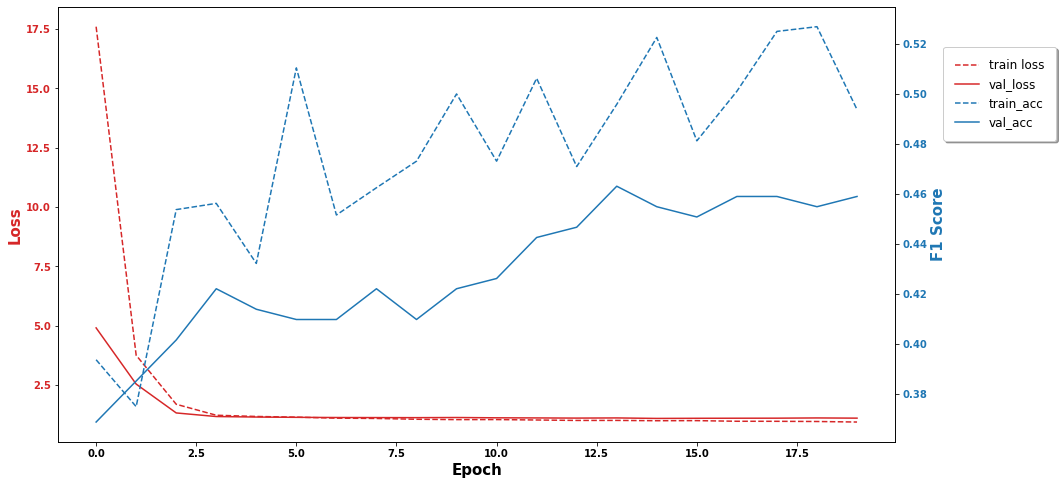

In [31]:
fig, ax = plt.subplots(figsize = (15, 8))
nn_training_analysis(history.history,False,ax)

In [32]:
pred=cv2.imread(r'C:\Users\Etay\Downloads\GettyImages-1179209019-03c80688cad6476396e284583e877311.jpg')
pred.resize(1,250,250,3)
probs = model.predict([pred]).flatten()
index = np.argmax(probs)
index

0

In [33]:
 from sklearn.metrics import classification_report

In [34]:
y_pred= model.predict(validation_ds).argmax(1)
y_pred.shape

(244,)

In [35]:
y_true = np.concatenate([y for x, y in validation_ds], axis=0).argmax(1)

In [36]:
y_true.shape

(244,)

In [37]:
print(classification_report(y_true, y_pred, target_names=['0','1','2']))

              precision    recall  f1-score   support

           0       0.40      0.68      0.51       107
           1       0.38      0.19      0.25        96
           2       0.07      0.02      0.04        41

    accuracy                           0.38       244
   macro avg       0.28      0.30      0.26       244
weighted avg       0.34      0.38      0.33       244

